In [1]:
# 环境依赖
# python = 3.10.6（不唯一）
# numpy==1.23.4 pandas scipy pytabix 

# 设置start、end、step自动检验（多样本)【主方法】

In [ ]:
import functions as F
import HypothesisTesting as ht
import numpy as np
import pandas as pd

random.seed(42)
np.random.seed(42)

# 4 修改参数和目录后运行
# 参数设置
chr = '1'  # 染色体号
start = 10400  # 起始位置
end = 10800  # 结束位置
step = 500  # 步长
cpg_sites_file = './data/cpg_standard.bed.gz'
# 将两组样本分别置于'./data/APL'、'./data/Remission'目录下

# 处理APL组文件
apl_folder = './data/APL'
n_list, theta1 = F.process_files(apl_folder, chr, start, end, step,compress=False, vis=False) # compress=True表示样本叠置，无需叠置可改为False；vis表示叠置后可视化，可关闭

# 处理Remission组文件
remission_folder = './data/Remission'
_, theta2 = F.process_files(remission_folder, chr, start, end, step,compress=False, vis=False)

# 进行unmat_test检验
result = ht.unmat_tests(n_list, theta1, theta2)

# 输出结果
print("Test Results:")
print(f"Tmml test statistic: {result[0][0]}, p-value: {result[0][1]}")
print(f"Tnme test statistic: {result[1][0]}, p-value: {result[1][1]}")
print(f"Tpdm test statistic: {result[2][0]}, p-value: {result[2][1]}")
print(f"Tpdr test statistic: {result[3][0]}, p-value: {result[3][1]}")
print(f"Tchalm test statistic: {result[4][0]}, p-value: {result[4][1]}")
print(f"Tmcr test statistic: {result[5][0]}, p-value: {result[5][1]}")

### 注意！此处两组组内样本使用的全部是APL和Remission_del41的副本，因此计算结果相同，请在正式使用时放入符合的数据包
### 注意！模拟退火这类算法存在随机性，相同样本不控制种子也会导致结果不同，故在Inference内部和此处均控制random.seed(42)

# 设置start、end、step自动检验（单样本）

In [ ]:
cpg_sites_file = './data/cpg_standard.bed.gz'
start = 10000
end = 12306
step=500  # 设置起始点、终止点，和分区的bp长度（默认500）

In [ ]:
data = pd.read_csv('./data/APL.mhap.gz',sep='\t',header=None,dtype={3:'str'})  # 单独读入一个样本的数据，计算单个参数向量

In [ ]:
n_list,theta1 = F._cal_cpel(cpg_sites_file, data,chr='1',start=start,end=end,step=step)

In [ ]:
print(n_list,theta1)  # 查看每个分区覆盖的CpGs位点个数，及各个分区上的参数[α1, ..., αk, β]，注意这是单样本的参数向量

In [ ]:
data0 = pd.read_csv('./data/Remission_del041.mhap.gz',sep='\t',header=None,dtype={3:'str'})  # 对照组做相同的操作
n_list,theta2 = F._cal_cpel(cpg_sites_file, data,chr='1',start=start,end=end,step=step)

In [ ]:
print(n_list,theta2)

In [ ]:
# 把所有样本的参数组合成[theta]传入下面的函数。例如：
# 例如：APL组7个样本，计算theta_APL1到theta_APL7,theta_Remission1到theta_Remission5，组合为:
# theta1=[theta_APL1, theta_APL2, theta_APL3, theta_APL4, theta_APL5, theta_APL6, theta_APL7]
# theta2=[theta_Remission1, theta_Remission2, theta_Remission3, theta_Remission4, theta_Remission5]
# 随后运行下面的函数
ht.unmat_tests(n_list,[theta1],[theta2])  # 返回内容为：((Tmml,p_value_tmml),(Tnme,p_value_tnme),(Tpdm,p_value_tmml))

# 绘图

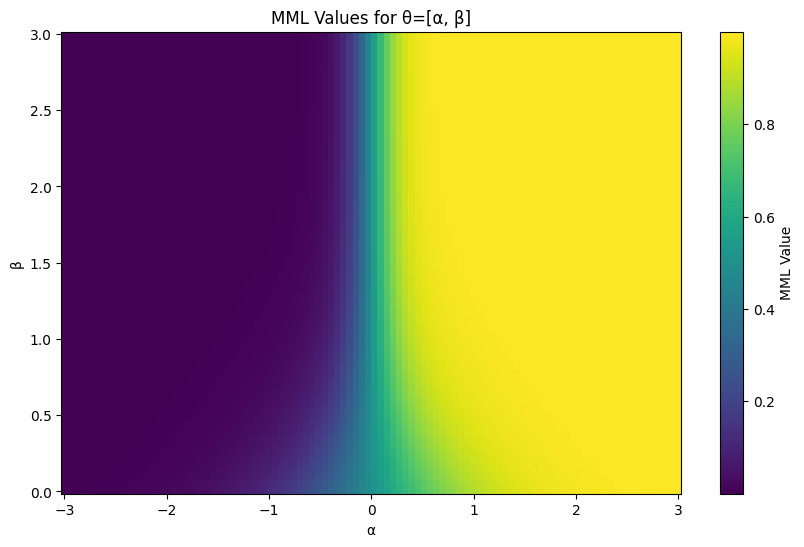

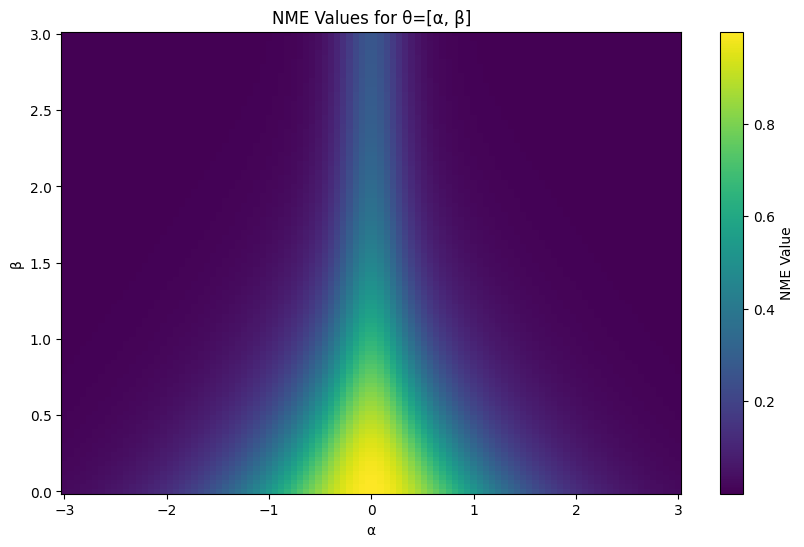

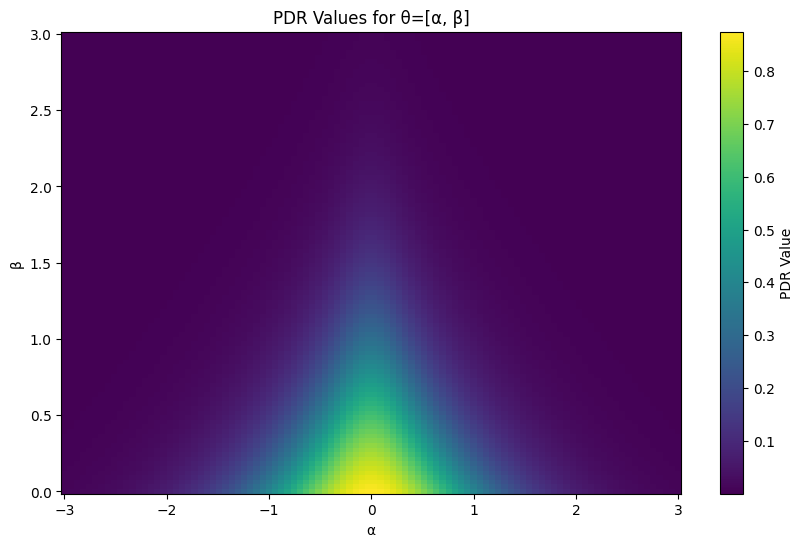

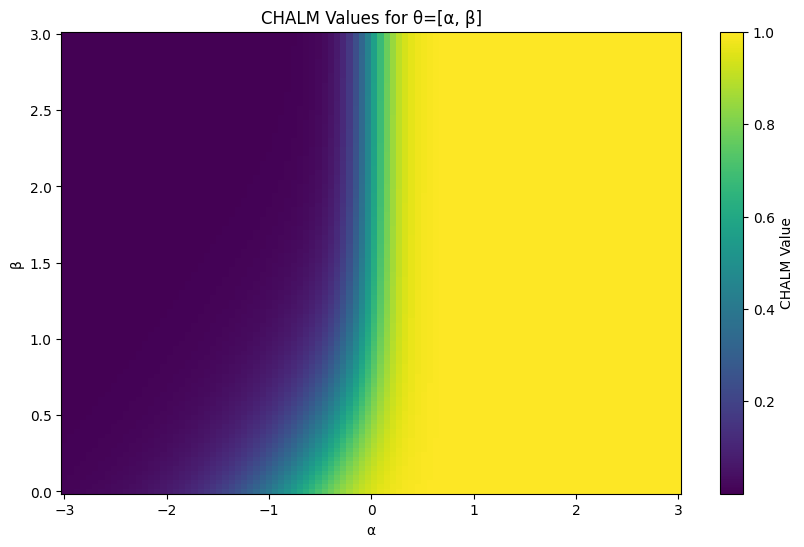

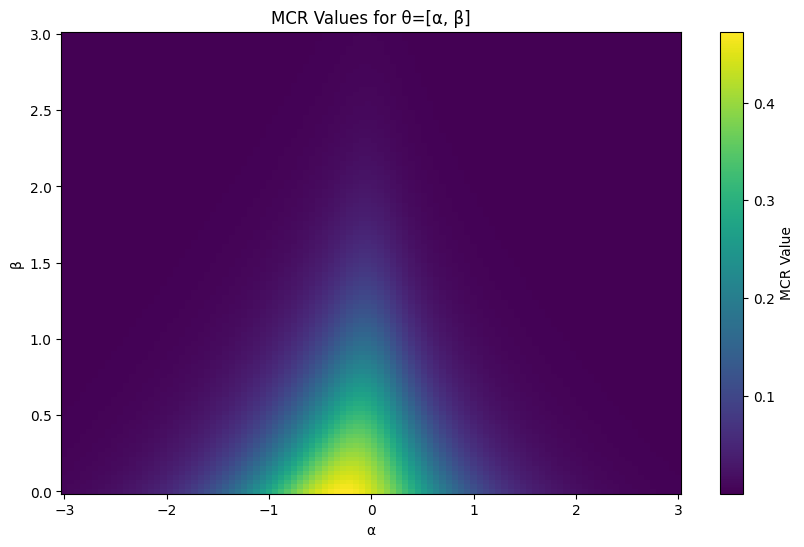

In [2]:
import Inference as inf
import matplotlib.pyplot as plt
import numpy as np
import HypothesisTesting as ht

n = [4]
alpha_range = np.linspace(-3, 3, 100)
beta_range = np.linspace(0, 3, 100)
alpha_grid, beta_grid = np.meshgrid(alpha_range, beta_range)

# 计算统计量值
mml_values = np.zeros_like(alpha_grid)
nme_values = np.zeros_like(alpha_grid)
pdr_values = np.zeros_like(alpha_grid)
chalm_values = np.zeros_like(alpha_grid)
mcr_values = np.zeros_like(alpha_grid)
for i in range(len(alpha_range)):
    for j in range(len(beta_range)):
        theta = [alpha_range[i], beta_range[j]]
        #修改（theta只有一个，不用求平均值）
        grad_logZ = inf.get_grad_logZ(n, theta)
        mml = inf.comp_mml(n, grad_logZ) 
        nme = inf.comp_nme(n,theta,grad_logZ)
        pdr = inf.comp_pdr(n,theta)
        chalm = inf.comp_chalm(n,theta)
        mcr = inf.comp_mcr(n,theta,grad_logZ)
        
        mml_values[j, i] = mml
        nme_values[j, i] = nme
        pdr_values[j, i] = pdr
        chalm_values[j, i] = chalm
        mcr_values[j, i] = mcr
        

# 绘制热图
plt.figure(figsize=(10, 6))
plt.pcolormesh(alpha_grid, beta_grid, mml_values, shading='auto', cmap='viridis')
plt.colorbar(label='MML Value')
plt.xlabel('α')
plt.ylabel('β')
plt.title('MML Values for θ=[α, β]')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(alpha_grid, beta_grid, nme_values, shading='auto', cmap='viridis')
plt.colorbar(label='NME Value')
plt.xlabel('α')
plt.ylabel('β')
plt.title('NME Values for θ=[α, β]')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(alpha_grid, beta_grid, pdr_values, shading='auto', cmap='viridis')
plt.colorbar(label='PDR Value')
plt.xlabel('α')
plt.ylabel('β')
plt.title('PDR Values for θ=[α, β]')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(alpha_grid, beta_grid, chalm_values, shading='auto', cmap='viridis')
plt.colorbar(label='CHALM Value')
plt.xlabel('α')
plt.ylabel('β')
plt.title('CHALM Values for θ=[α, β]')
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(alpha_grid, beta_grid, mcr_values, shading='auto', cmap='viridis')
plt.colorbar(label='MCR Value')
plt.xlabel('α')
plt.ylabel('β')
plt.title('MCR Values for θ=[α, β]')
plt.show()

# 假设检验simulation(不匹配)

In [ ]:
import Simulations as S
# 设置参数
m = 5    
n = [4]      
θ1 = [0.5,0.5]  
θ2 = [-0.5,0.5]  

# 获取ECDF函数
ecdf_tmml, ecdf_tnme, ecdf_tpdm,ecdf_tpdr, ecdf_tchalm,  ecdf_tmcr, pvals = S.unmat_pvalue_ecdf(m, n, θ1, θ2)
tmml_pvals, tnme_pvals, tpdm_pvals, tpdr_pvals, tchalm_pvals ,tmcr_pvals= pvals


#绘制经验CDF图
import matplotlib.pyplot as plt

# 创建包含六个子图的图形
plt.figure(figsize=(18, 5))

#计算每个统计量在α=0.05处的累积概率
alpha = 0.05
pr_tmml = ecdf_tmml(alpha)
pr_tnme = ecdf_tnme(alpha)
pr_tpdm = ecdf_tpdm(alpha)
pr_tpdr = ecdf_tpdr(alpha)
pr_tchalm = ecdf_tchalm(alpha)
pr_tmcr = ecdf_tmcr(alpha)

# 子图索引调整
statistics = [
    ("TMML", ecdf_tmml, pr_tmml),
    ("TNME", ecdf_tnme, pr_tnme),
    ("TPDM", ecdf_tpdm, pr_tpdm),
    ("TPDR", ecdf_tpdr, pr_tpdr),
    ("TCHALM", ecdf_tchalm, pr_tchalm),
    ("TMCR", ecdf_tmcr, pr_tmcr)
]

for i, (title, ecdf_func, pr_val) in enumerate(statistics, 1):
    plt.subplot(1, 6, i)
    x = np.linspace(0, 1, 100)
    plt.plot(x, [ecdf_func(xi) for xi in x], 'b-', linewidth=2)
    
    if pr_val >= 0.95:
        plt.scatter(0.5, 0.5, color='red', s=150, marker='$*$', zorder=5)
    
    if pr_val < 0.01:
        text = f'Pr[p≤{alpha}] < 0.01'
    else:
        text = f'Pr[p≤{alpha}] = {pr_val:.2f}'
    
    plt.text(0.05, 0.95, text, 
             fontsize=10, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.xlabel('P_value')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.05)
    if i == 1:
        plt.ylabel('cumulative probability')

# 调整布局
plt.tight_layout()
plt.show()


# 假设检验simulation(匹配)

In [ ]:
# 设置参数
m = 5    
n = [4]      
θ1 = [0.5,0.5]  
θ2 = [0.5,0.5]  

# 获取ECDF函数
ecdf_tmml, ecdf_tnme,ecdf_tpdr, ecdf_tchalm,  ecdf_tmcr, pvals = S.mat_pvalue_ecdf(m, n, θ1, θ2)
tmml_pvals, tnme_pvals,  tpdr_pvals, tchalm_pvals ,tmcr_pvals= pvals


#绘制经验CDF图
import matplotlib.pyplot as plt

# 创建包含五个子图的图形
plt.figure(figsize=(15, 4))

#计算每个统计量在α=0.05处的累积概率
alpha = 0.05
pr_tmml = ecdf_tmml(alpha)
pr_tnme = ecdf_tnme(alpha)
pr_tpdr = ecdf_tpdr(alpha)
pr_tchalm = ecdf_tchalm(alpha)
pr_tmcr = ecdf_tmcr(alpha)


# 子图索引调整
statistics = [
    ("TMML", ecdf_tmml, pr_tmml),
    ("TNME", ecdf_tnme, pr_tnme),
    ("TPDR", ecdf_tpdr, pr_tpdr),
    ("TCHALM", ecdf_tchalm, pr_tchalm),
    ("TMCR", ecdf_tmcr, pr_tmcr)
]

for i, (title, ecdf_func, pr_val) in enumerate(statistics, 1):
    plt.subplot(1, 5, i)
    x = np.linspace(0, 1, 100)
    plt.plot(x, [ecdf_func(xi) for xi in x], 'b-', linewidth=2)
    
    if pr_val >= 0.95:
        plt.scatter(0.5, 0.5, color='red', s=150, marker='$*$', zorder=5)
    
    if pr_val < 0.01:
        text = f'Pr[p≤{alpha}] < 0.01'
    else:
        text = f'Pr[p≤{alpha}] = {pr_val:.2f}'
    
    plt.text(0.05, 0.95, text, 
             fontsize=10, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.xlabel('P_value')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1.05)
    if i == 1:
        plt.ylabel('cumulative probability')

# 调整布局
plt.tight_layout()
plt.show()



# 统计量simulation

In [6]:
import Simulations as S
import matplotlib.pyplot as plt
import numpy as np
n1 = [10]
xobs1 = [[1] * 10 for _ in range(15)] + [[-1] * 10 for _ in range(15)]
results1 = S.comp_stat(n1,xobs1)
print(results1)
#((0.50031233, 0.5), (0.1012661, 0.1), (0.0011880199999999563, 0.0), (0.5008364599999999, 0.5), (0.000524129999999956, 0.0, 0.0))

import random
random.seed(42)
n2=[10]
xobs2 = [[random.choice([-1, 1]) for _ in range(10)] for _ in range(30)]
results2 = S.comp_stat(n2, xobs2)
print(results2)


n3=[5]
θ3=[0.5,0.5]
xobs3=[]
for i in range(20):
    x = S.gen_x_mc(n3, θ3)  
    xobs3.append(x)
print(xobs3)
results3=S.comp_stat(n3,xobs3)
print(results3)

n4=[10]
θ4=[0.5,0.5]
xobs4=[]
for i in range(20):
    x = S.gen_x_mc(n4, θ4)  
    xobs4.append(x)
print(xobs4)
results4=S.comp_stat(n4,xobs4)
print(results4)

((0.5000001, 0.5), (0.1006485, 0.1), (0.00040850999999997306, 0.0), (0.5002043199999999, 0.5), (0.0002042199999999772, 0.0, 0.0))
((0.44000001, 0.44), (0.98954674, 0.49068906), (0.99649524, 1.0), (0.9967929, 1.0), (0.55679289, 0.56, 0.56))
[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, -1], [1, 1, 1, 1, 1], [1, 1, 1, -1, -1], [1, -1, -1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [-1, -1, -1, 1, 1], [1, 1, 1, -1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, -1, 1, 1, 1], [-1, 1, 1, 1, -1], [1, 1, 1, -1, -1], [1, 1, 1, 1, 1]]
((0.86000001, 0.86), (0.52752644, 0.41419012), (0.41742961999999995, 0.4), (0.99396645, 1.0), (0.1339664399999999, 0.14, 0.14))
[[1, 1, 1, 1, -1, -1, 1, 1, 1, 1], [1, 1, 1, 1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1